In [ ]:
Question Reference
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('S:/Codes/DataHackthon/BigMart/train_bigmart.csv')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Quantity                     8523 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 865.7+ KB


In [86]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Quantity
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,15.425685
std,4.643456,0.051598,62.275067,8.371760,1706.499616,9.192655
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.952322
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,8.949479
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,14.926893
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,21.092696
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.844890


In [87]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Quantity                        0
dtype: int64

In [88]:
train['Quantity']=train['Item_Outlet_Sales']/train['Item_MRP']

In [ ]:
#DATA VISUALIZATION
1.UNIVARIANTE ANALYSIS
  a.)Target variable
  b.)Independent Categorical Variable(Nominal)
  b.)Independent Categorical Variable(Ordinal)
  c.)Independent Numerical Variable
2.BIVARIANTE ANALYSIS
  a.)Independent Categorical vs Target Variable
  b.)Independent Numerical   vs Target Variable


In [ ]:
1.UNIVARIANTE ANALYSIS
  a.)Target variable`

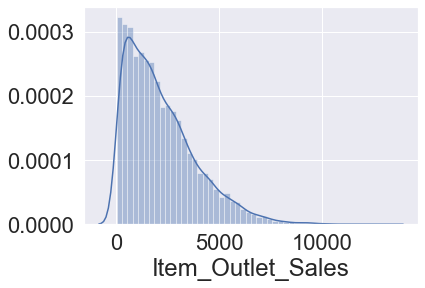

In [37]:
sns.distplot(train['Item_Outlet_Sales'])

In [ ]:
#The target distribution is Right Skewed i.e 'No.of Sales are high for Item_Outlet_Sales B/W 0-2500' 
#But above plot is misinterpreted if we view from Total Sales(without grouping by correct category).
#We can get appropiate interpretation by overlaying different group density plots.

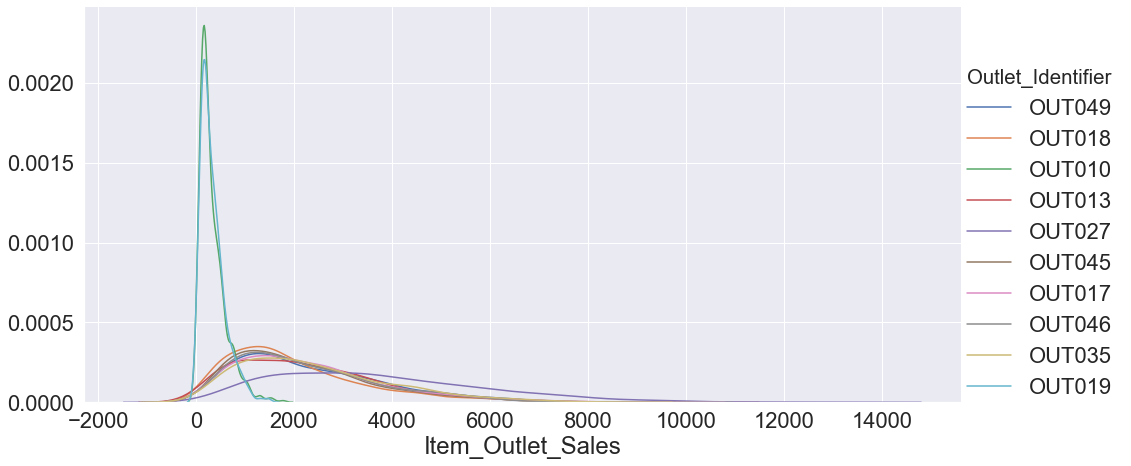

In [36]:
sns.set(font_scale=2)
dist = sns.FacetGrid(train, hue = 'Outlet_Identifier',height = 7,aspect = 2)
dist.map(sns.distplot,'Item_Outlet_Sales',hist = False)
dist.add_legend()

In [ ]:
#1.From above plot we can clearly see that how ONLY 2 DISTRIBUTIONS(OUT019,OUT010) have more contribution towards total
#  Item_Outlet_sale ranging from 0 to ~1000 
#2.Remaining Outlets are nearly distributed same 

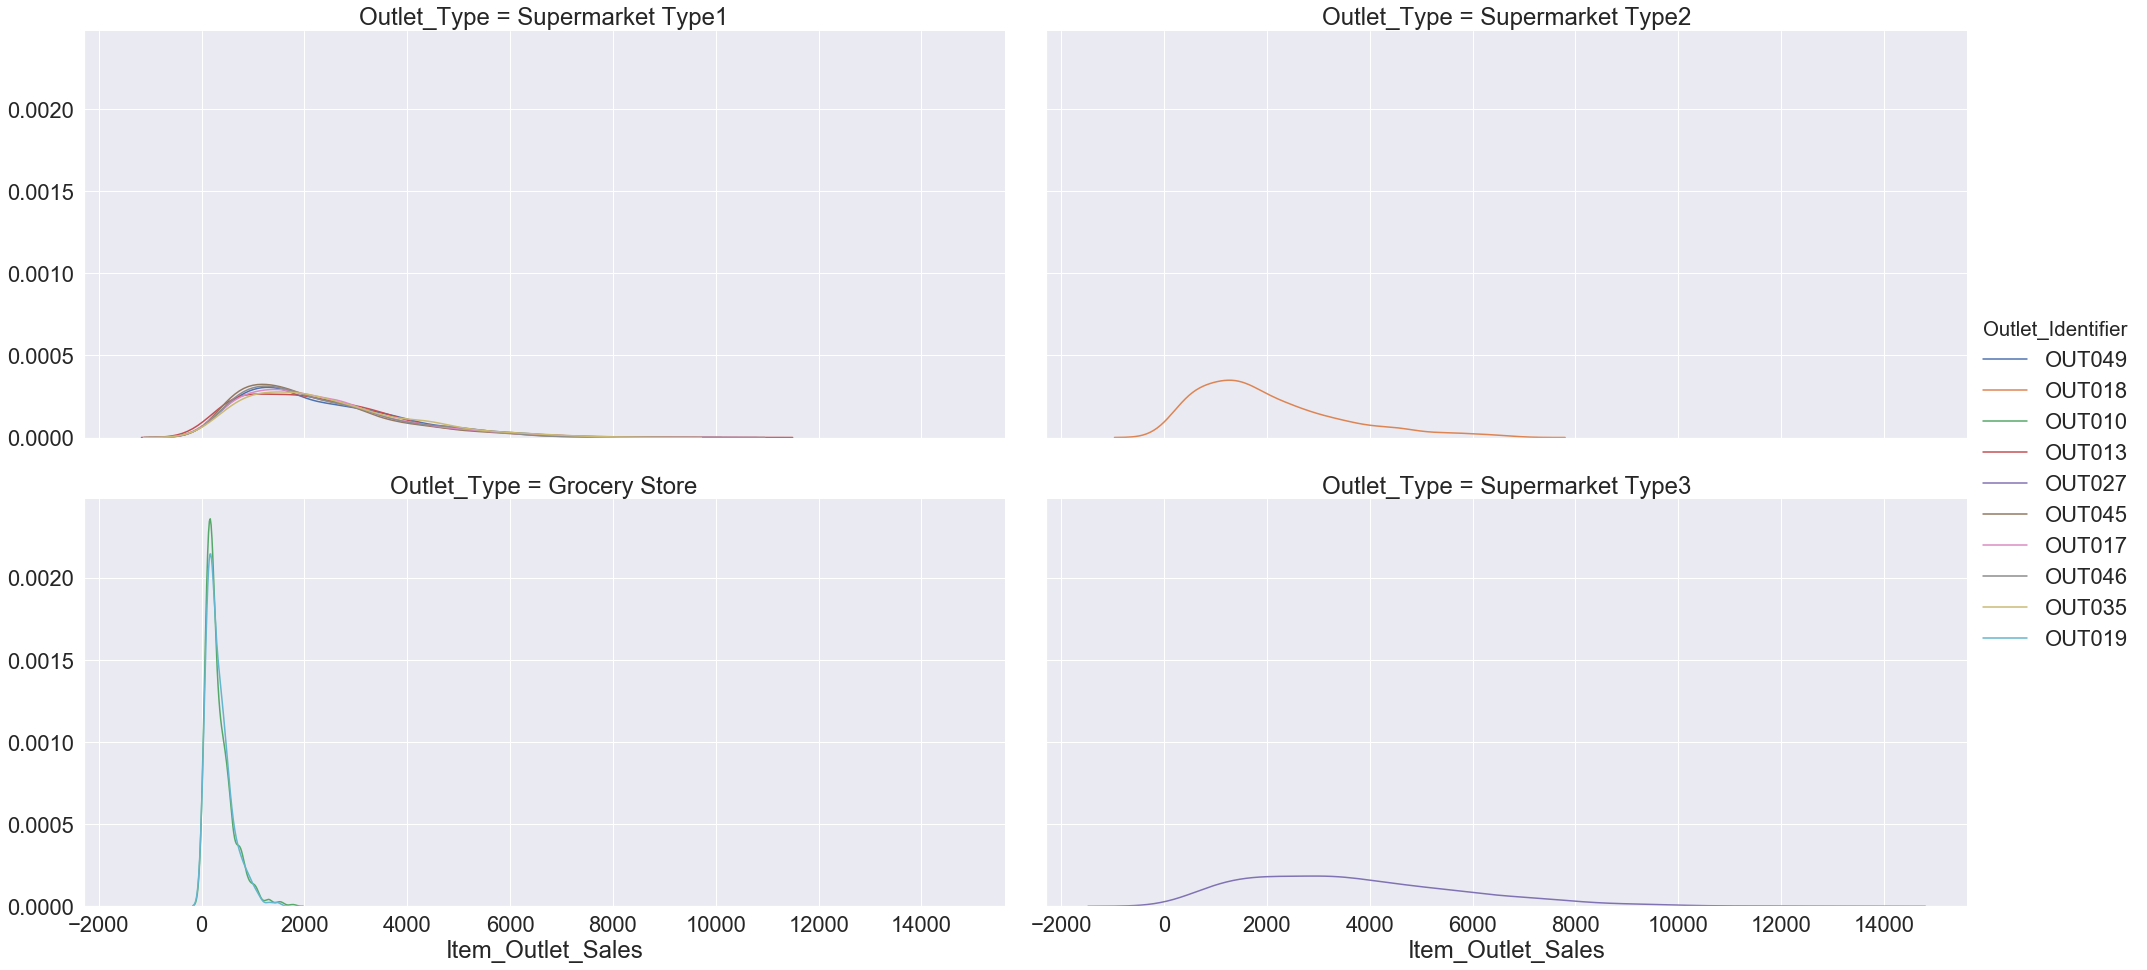

In [38]:
sns.set(font_scale=2)
dist_col = sns.FacetGrid(train, hue = 'Outlet_Identifier',col = 'Outlet_Type',col_wrap = 2,margin_titles = True,height = 7,aspect = 2)
dist_col.map(sns.distplot,'Item_Outlet_Sales',hist = False)
dist_col.add_legend()

In [ ]:
#1.The  2 outlet sales distributions are more narrow than other Because those 2 outlet stores are GROCERY STORE 
#can be interfered by above plot 
#2.Because Grocey Stores only have low MRP products which could be the reason
#3.Item_Outlet_Sales Distributions by Outlet type are same

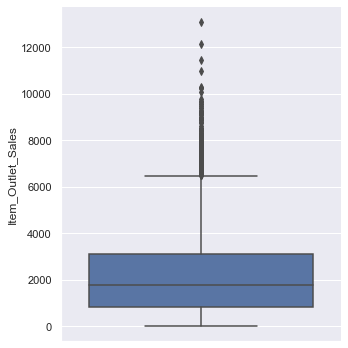

In [40]:
sns.set(font_scale=1)
sns.catplot(y = 'Item_Outlet_Sales',data = train,kind = 'box')

<Figure size 1080x288 with 0 Axes>

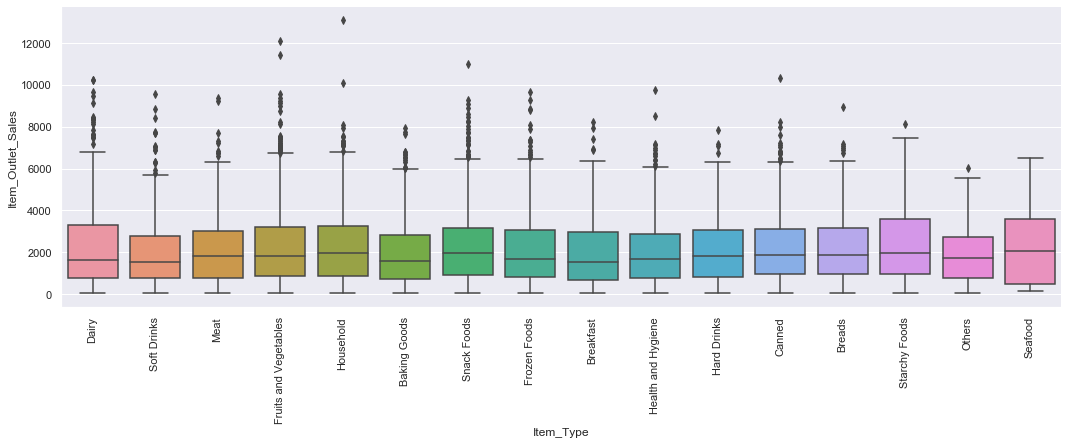

In [49]:
plt.figure(figsize=(15,4))
box_ios = sns.catplot(y = 'Item_Outlet_Sales',x = 'Item_Type',data = train,kind = 'box',height = 5,aspect = 3)
box_ios.set_xticklabels(rotation=90)

In [ ]:
#From above plot we see the outliers are there looks like we need to do outlier treatment as well as skewness treatment

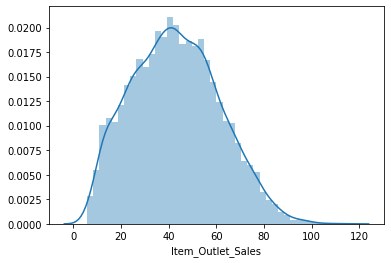

In [3]:
sns.distplot(np.sqrt(train['Item_Outlet_Sales']))

In [ ]:
#The skewness is drastically reduced on squareroot transformation of target variable

In [ ]:
b.)Independent Variable (Categorical)





In [50]:
train.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#Lets Say
'Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type'         categorical
'Outlet_Establishment','Outlet_Size','Outlet_Location_Type'              Ordinal


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


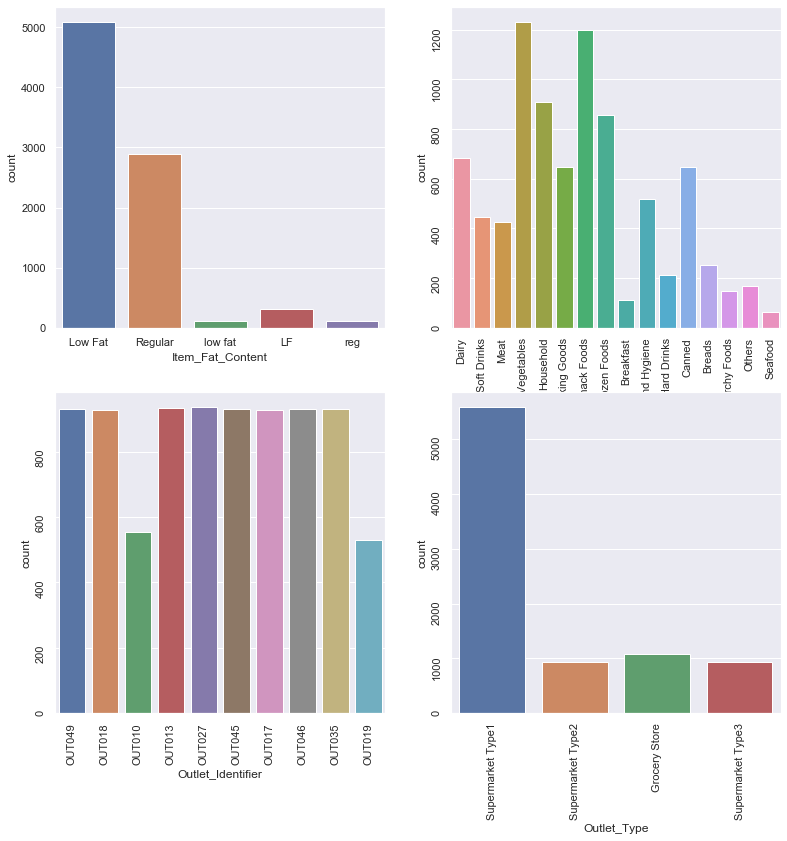

In [59]:
fig, ax =plt.subplots(2,2)
fig.set_figheight(13)
fig.set_figwidth(13)
ax[0,1].tick_params(labelrotation=90)
ax[1,0].tick_params(labelrotation=90)
ax[1,1].tick_params(labelrotation=90)
sns.countplot(train['Item_Fat_Content'], ax=ax[0,0])
sns.countplot(train['Item_Type'], ax=ax[0,1])
sns.countplot(train['Outlet_Identifier'], ax=ax[1,0])
sns.countplot(train['Outlet_Type'], ax=ax[1,1])
fig.show()


In [ ]:
#plot(1,1) -- The low fat content has many duplicate names
#plot(1,2) -- Items purchased by customers more No. of times are Vegetables,Frozen Foods and least are Snacks and breakfast foods
#plot(2,1) -- Outlet Prefered by customer are nearly same except out010 and out019
#plot(2,2) -- Supermarrket 1 has more number of sales (more number of customers)

In [ ]:
c.)Independent Variable (ordinal)





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


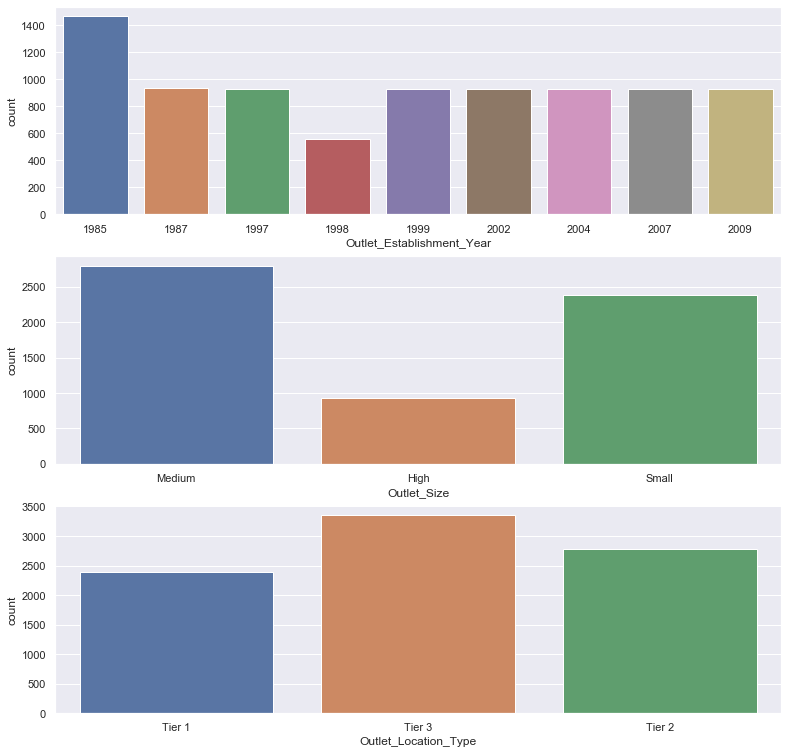

In [60]:

fig, ax =plt.subplots(3,1)
fig.set_figheight(13)
fig.set_figwidth(13)
sns.countplot(train['Outlet_Establishment_Year'], ax=ax[0])
sns.countplot(train['Outlet_Size'], ax=ax[1])
sns.countplot(train['Outlet_Location_Type'], ax=ax[2])
fig.show()


In [ ]:
#plot(1)--the older outlet has more number of Customers which is quite obvious as store is running from long ago and it would be
#         the popular store in that region
#plot(2)--the high outlet size has low number of customers which in not obvious this fact can be intreprected by associate 
#         variables
#plot(3)--the Tier 3 outlet_location store has more number of Customers (less competition and brand value would be the reason)

In [ ]:
# # d.)Numerical Independent variable


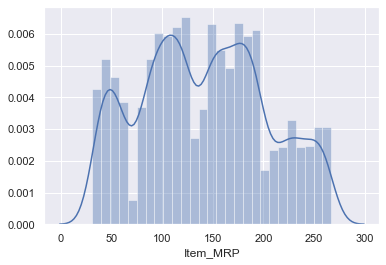

In [61]:
sns.distplot(train['Item_MRP'])


In [ ]:
#Distribution of Item_MRP --
#Most of Items_MRP are rounded to 50's,100's would be the reason

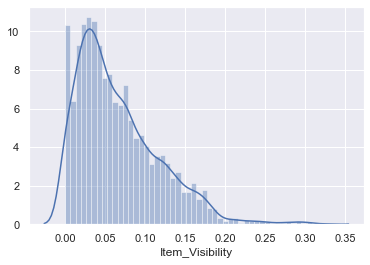

In [68]:
sns.distplot(train['Item_Visibility'])

In [ ]:
#Distribution of Item Visibility
#Small Items(Snacks) are less visible yet more in number as compered to Large Items(ex. HouseHold Products)

In [ ]:
2.)bivariante analysis

a.)independent categorical vs target




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


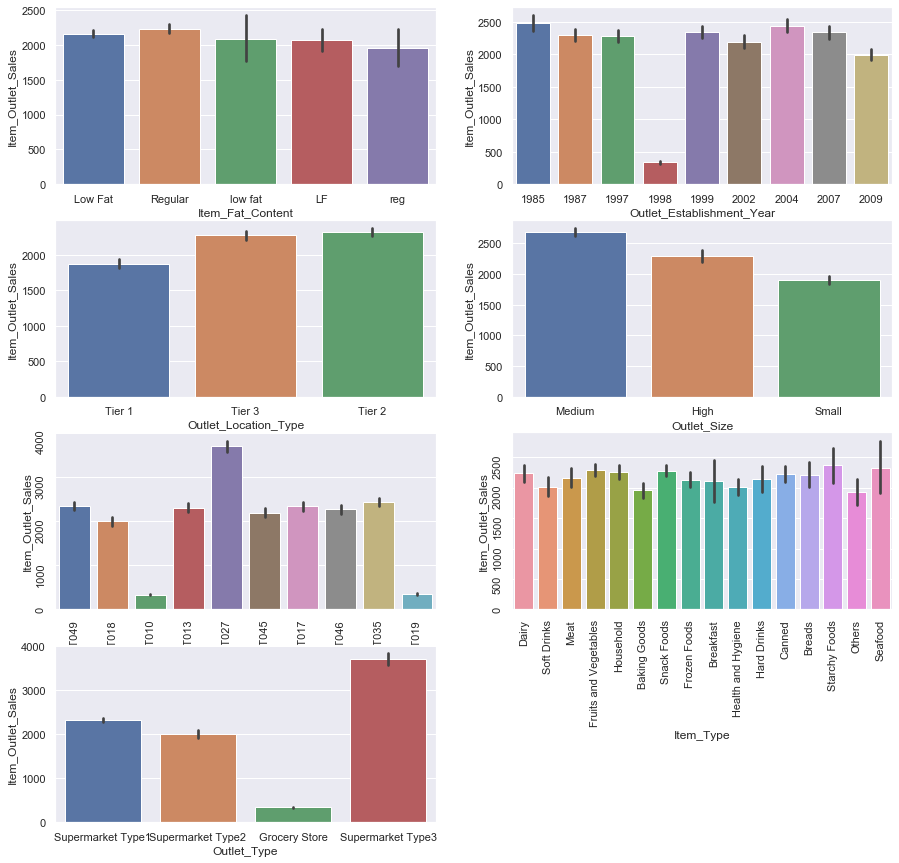

In [74]:
fig, ax =plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[2,1].tick_params(labelrotation=90)
ax[2,0].tick_params(labelrotation=90)
ax[3,1].set_visible(False)
sns.barplot(data = train,x = 'Item_Fat_Content',y = 'Item_Outlet_Sales', ax=ax[0,0])
sns.barplot(data = train,x ='Outlet_Location_Type' ,y = 'Item_Outlet_Sales', ax=ax[1,0])
sns.barplot(data = train,x = 'Outlet_Identifier',y = 'Item_Outlet_Sales', ax=ax[2,0])
sns.barplot(data = train,x = 'Outlet_Type',y = 'Item_Outlet_Sales', ax=ax[3,0])
sns.barplot(data = train,x = 'Outlet_Establishment_Year',y = 'Item_Outlet_Sales', ax=ax[0,1])
sns.barplot(data = train,x = 'Outlet_Size',y = 'Item_Outlet_Sales', ax=ax[1,1])
sns.barplot(data = train,x = 'Item_Type',y = 'Item_Outlet_Sales', ax=ax[2,1])

fig.show()

In [ ]:
# #The above plot is
# 1.) plot(2,1),plot(4,0) -- Outlet Est. in 1998 have less overall sales.(From train data 1998 store is Grocey Store
                            
# 2.) plot(3,2) --  All types of items has nearly  same sales 

# 3.) plot(3,0)  -- OUT010,OUT019 are grocery stores less no. of sales

In [ ]:
#independent numerical vs target



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


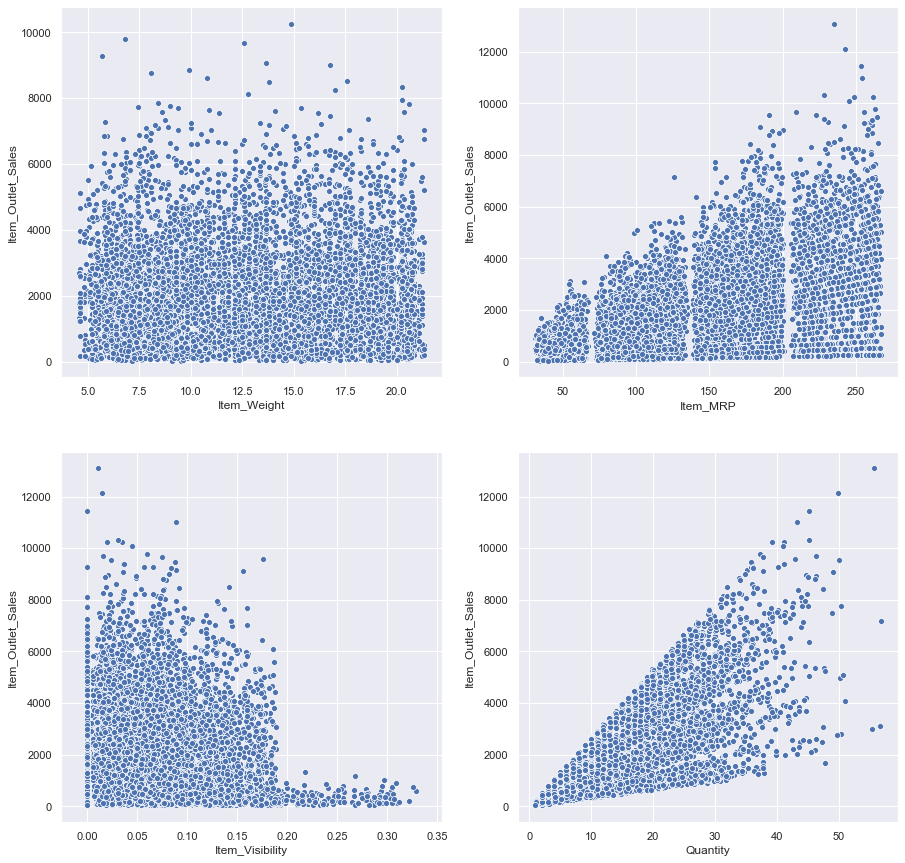

In [80]:
fig, ax =plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.scatterplot(data = train,x = 'Item_Weight',y = 'Item_Outlet_Sales', ax=ax[0,0])
sns.scatterplot(data = train,x ='Item_Visibility' ,y = 'Item_Outlet_Sales', ax=ax[1,0])
sns.scatterplot(data = train,x = 'Item_MRP',y = 'Item_Outlet_Sales', ax=ax[0,1])
sns.scatterplot(data = train,x = 'Quantity',y = 'Item_Outlet_Sales', ax=ax[1,1])
fig.show()

In [ ]:
# plot(1,1) -- The data points are more congested at lower Outlet_Sales and doesnt change with weight
# plot(1,2) -- As MRP increases Outlet Sales are increasing
# plot(2,1) -- Item_visibilit @ 0.19 a strange pattern can we observed 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


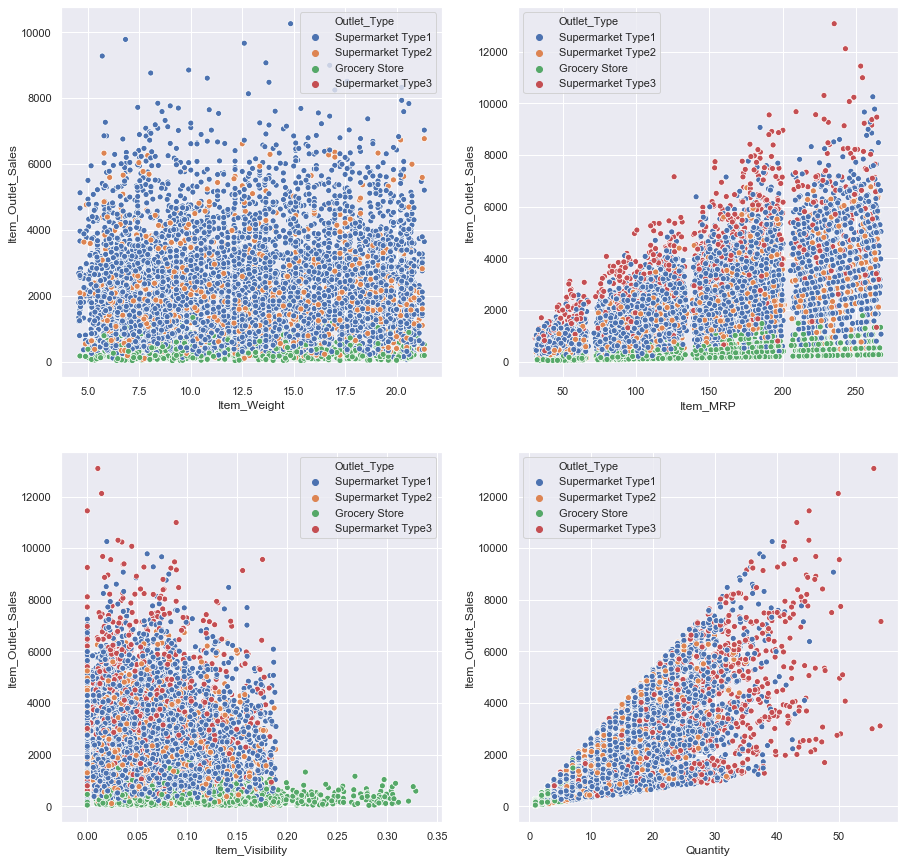

In [81]:
fig, ax =plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.scatterplot(data = train,x = 'Item_Weight',y = 'Item_Outlet_Sales',hue = 'Outlet_Type', ax=ax[0,0])
sns.scatterplot(data = train,x ='Item_Visibility' ,y = 'Item_Outlet_Sales', hue = 'Outlet_Type',ax=ax[1,0])
sns.scatterplot(data = train,x = 'Item_MRP',y = 'Item_Outlet_Sales', hue = 'Outlet_Type',ax=ax[0,1])
sns.scatterplot(data = train,x = 'Quantity',y = 'Item_Outlet_Sales', hue = 'Outlet_Type',ax=ax[1,1])
fig.show()


In [ ]:
# 1.)Green dots are grocery are thre in bottom of the plots
# 2.)More number of Red Dots of SuperMarket Type 3 have more sales than any other

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


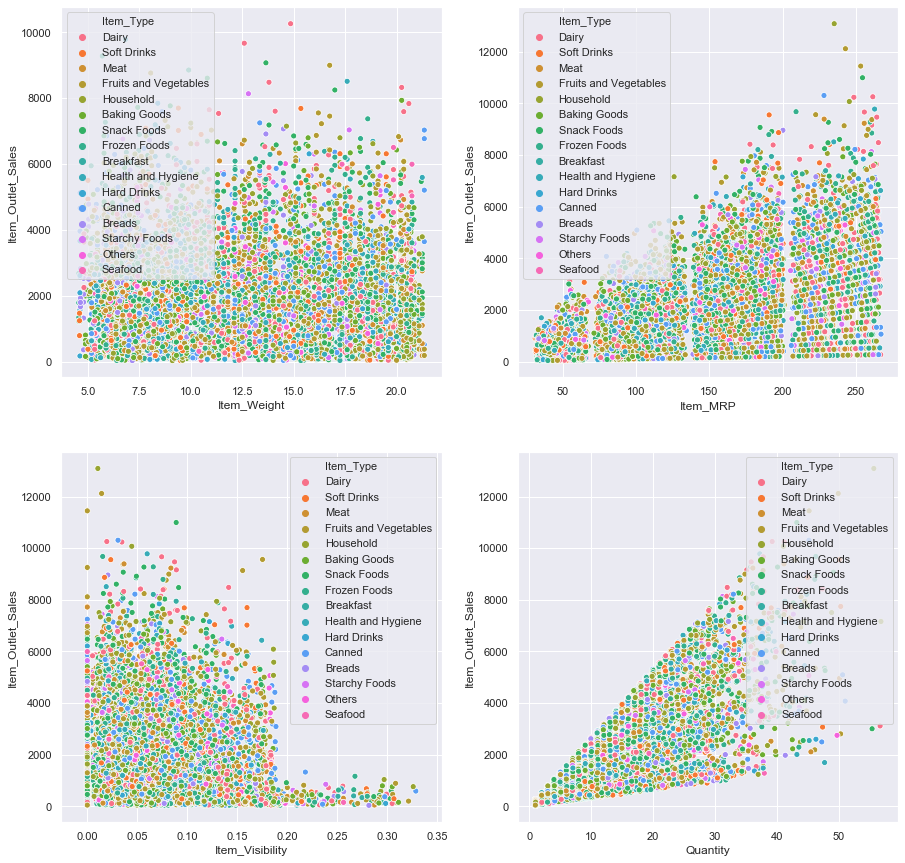

In [83]:
fig, ax =plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.scatterplot(data = train,x = 'Item_Weight',y = 'Item_Outlet_Sales',hue = 'Item_Type', ax=ax[0,0])
sns.scatterplot(data = train,x ='Item_Visibility' ,y = 'Item_Outlet_Sales', hue = 'Item_Type',ax=ax[1,0])
sns.scatterplot(data = train,x = 'Item_MRP',y = 'Item_Outlet_Sales', hue = 'Item_Type',ax=ax[0,1])
sns.scatterplot(data = train,x = 'Quantity',y = 'Item_Outlet_Sales', hue = 'Item_Type',ax=ax[1,1])
fig.show()


In [ ]:
# nothing can be interfered by this legend plot so Item Type Would be the matter.

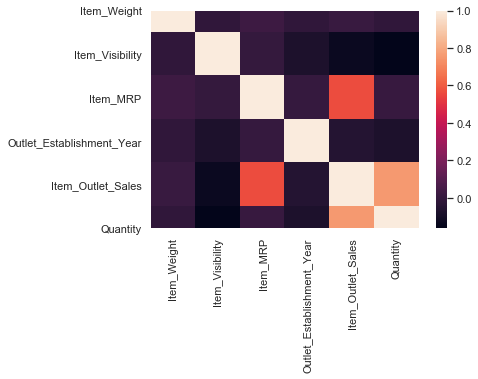

In [84]:
sns.heatmap(train.corr())